# Homework 4: Implementing + Evaluating Spatial Partitioning Data Structures

Jake Dame

24 Jun 2024

CS 6017: Data Analytics & Visualization

Dr. Ben Jones

## Part 1: Implementation

*See code*

## Part 2: Testing/Timing

*See code*

## Part 3: Analysis

### "Plot parts of your data to make sense of it(what impact to K, N, D, and the data structure have?)"

In [154]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [155]:
# Get data frame

df = pd.read_csv("timing_data/timing_data.csv")
df

,k,n,d,usecs,datastructure,test
0,10,100,2,10953,QuadTree,n
1,10,1100,2,56446,QuadTree,n
2,10,2100,2,59668,QuadTree,n
3,10,3100,2,83065,QuadTree,n
4,10,4100,2,126451,QuadTree,n
...,...,...,...,...,...,...
275,750,1000,2,521945,KDTree,k
276,800,1000,2,527911,KDTree,k
277,850,1000,2,545785,KDTree,k
278,900,1000,2,577858,KDTree,k


#### QuadTree Timing Plots

Text(0.5, 1.0, 'QuadTree k-NN Query: Number of Data Points to Search vs. Running Time')

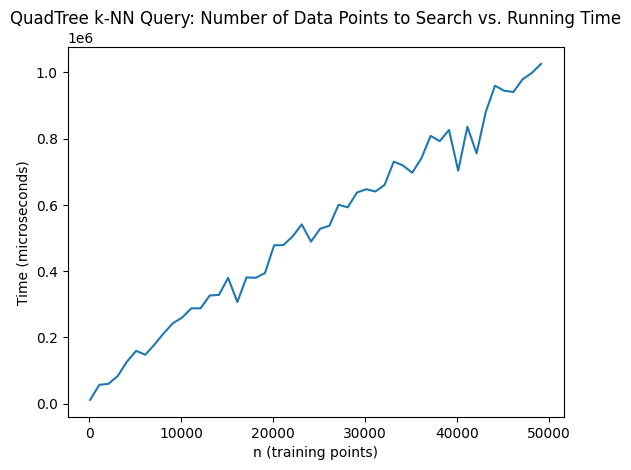

In [156]:
df_quad_n = df[ (df['datastructure'] == 'QuadTree') & (df['test'] == 'n') ]

plt.plot(df_quad_n['n'], df_quad_n['usecs'])

plt.xlabel('n (training points)')
plt.ylabel('Time (microseconds)')
plt.title('QuadTree k-NN Query: Number of Data Points to Search vs. Running Time')

Text(0.5, 1.0, 'QuadTree k-NN Query: Number of Neighbors to Find vs. Running Time')

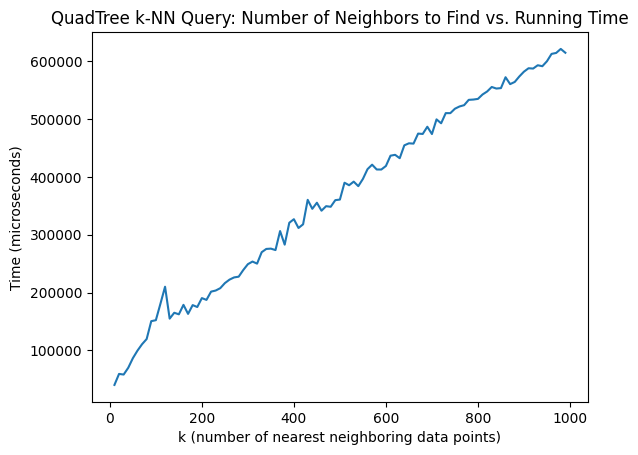

In [157]:
df_quad_k = df[ (df['datastructure'] == 'QuadTree') & (df['test'] == 'k') ]

plt.plot(df_quad_k['k'], df_quad_k['usecs'])

plt.xlabel('k (number of nearest neighboring data points)')
plt.ylabel('Time (microseconds)')
plt.title('QuadTree k-NN Query: Number of Neighbors to Find vs. Running Time')

#### $k$-D Tree Timing Plots

Text(0.5, 1.0, 'k-D Tree: Dimensionality vs. Running Time')

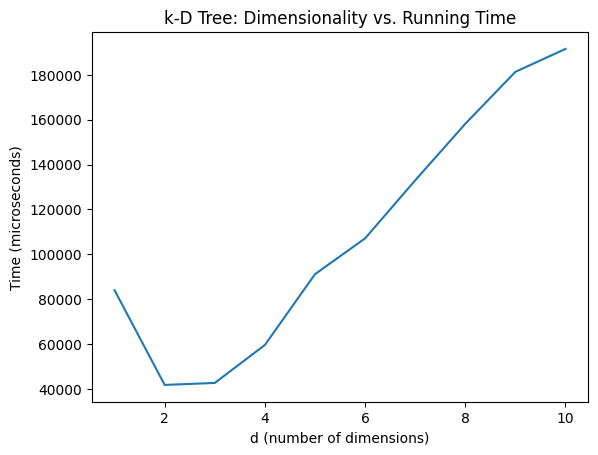

In [158]:
df_kd_d = df[ (df['datastructure'] == 'KDTree') & (df['test'] == 'd') ]

plt.plot(df_kd_d['d'], df_kd_d['usecs'])

plt.xlabel('d (number of dimensions)')
plt.ylabel('Time (microseconds)')
plt.title('k-D Tree: Dimensionality vs. Running Time')

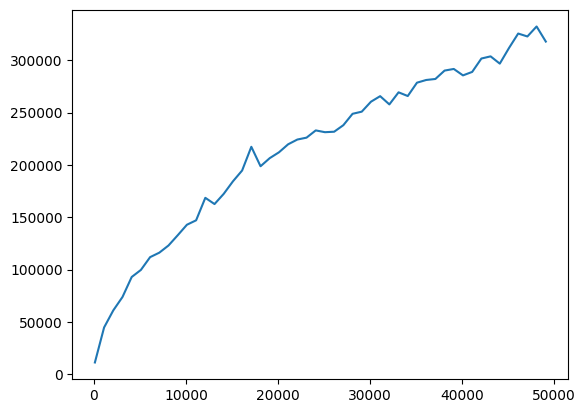

In [159]:
df_kd_n = df[ (df['datastructure'] == 'KDTree') & (df['test'] == 'n') ]

plt.plot(df_kd_n['n'], df_kd_n['usecs'])

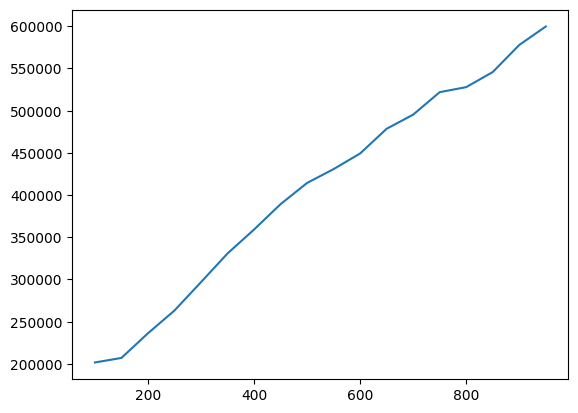

In [160]:
df_kd_k = df[ (df['datastructure'] == 'KDTree') & (df['test'] == 'k') ]

plt.plot(df_kd_k['k'], df_kd_k['usecs'])

#### Bucketing Plots

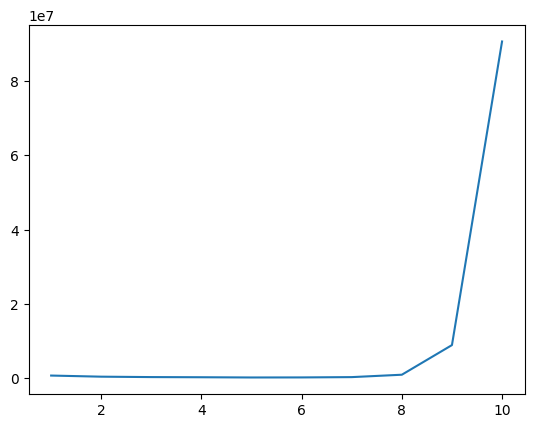

In [161]:
df_bucket_d = df[ (df['datastructure'] == 'Bucketing') & (df['test'] == 'd') ]

plt.plot(df_bucket_d['d'], df_bucket_d['usecs'])

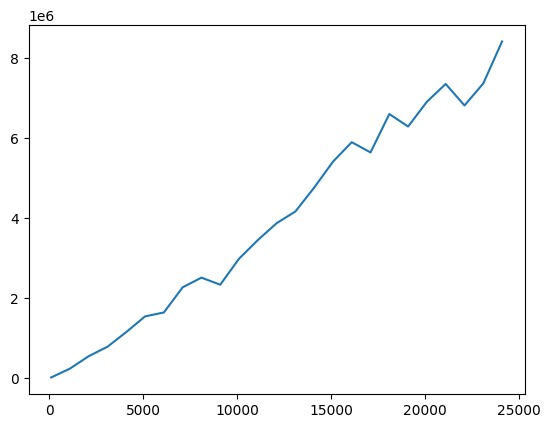

In [162]:
df_bucket_n = df[ (df['datastructure'] == 'Bucketing') & (df['test'] == 'n') ]

plt.plot(df_bucket_n['n'], df_bucket_n['usecs'])

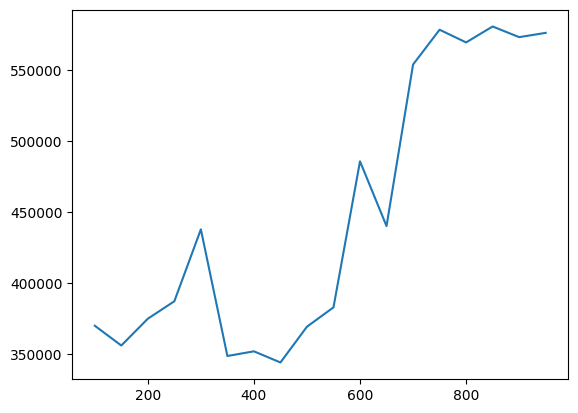

In [163]:
df_bucket_k = df[ (df['datastructure'] == 'Bucketing') & (df['test'] == 'k') ]

plt.plot(df_bucket_k['k'], df_bucket_k['usecs'])

#### Analysis

Nothing surprising about initial data

All of them are linear except:
- bucket d was insanely good performing until 6 then $2^N$
- bucket k was subject to luck of the draw concerning points and clumping and we see lots of variation
- kdtree n appears slightly like square root time or perhaps $NlogN$

### "Perform regression based on the performance we expect to see. Do tests confirm or disprove our expectations? What running times do you expect to see based on simple big-O analysis?"

#### Regression: QuadTree

In [200]:
df_quad = df[ (df['datastructure'] == 'QuadTree') ]

model_kd = smf.ols( formula='usecs ~ n + k', data=df_quad ).fit()

print( model_kd.summary() )

                            OLS Regression Results                            
Dep. Variable:                  usecs   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     6594.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          7.51e-144
Time:                        01:27:15   Log-Likelihood:                -1711.1
No. Observations:                 149   AIC:                             3428.
Df Residuals:                     146   BIC:                             3437.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.311e+04   3993.819     13.299      0.0

k alone has r squared of .03
n alone has r squared of .5

k + n have r squared of .989, both have strong positive coefficients and p values of 0

Meaning it is safe to say that a combination of k and n have the strongest predictive power for time performance on the quad tree

#### Regression: $k$-D Tree

In [203]:
df_kd = df[ (df['datastructure'] == 'KDTree') ]

model_kd = smf.ols( formula='usecs ~ n + k', data=df_kd ).fit()

print( model_kd.summary() )

                            OLS Regression Results                            
Dep. Variable:                  usecs   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     735.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           5.36e-50
Time:                        01:29:27   Log-Likelihood:                -911.63
No. Observations:                  78   AIC:                             1829.
Df Residuals:                      75   BIC:                             1836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.478e+04   5893.361     16.082      0.0

This is similar to the analysis on quad tree, except now we have the d parameter.

However, adding in d only increased the r squared from .95 to .96, with no other change, which confirms the expectation that kd tree is somewhat immune to the curse of dimensionality, because dimensionality doesn't really add anything substantial to explain performance variation.

#### Regression: Bucketing

In [204]:
df_bucket = df[ (df['datastructure'] == 'Bucketing') ]

model_bucket = smf.ols( formula='usecs ~ d + n', data=df_bucket ).fit()

print( model_bucket.summary() )

                            OLS Regression Results                            
Dep. Variable:                  usecs   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.96e-05
Time:                        01:29:45   Log-Likelihood:                -929.02
No. Observations:                  53   AIC:                             1864.
Df Residuals:                      50   BIC:                             1870.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.294e+06   3.01e+06     -3.090      0.0

d + n is strongest, adding k increases it negligibly. 

p value for k is not great (.496), and the r squared for the graph as a whole is not great either (.358) meaning there is more here to the bucketing approach, in terms of time complexity, than can be explained by just these three parameters.

This is potentially due to the random nature and luck involved in clumping within the divisions of the regular grid at the center of the bucketing approach, especially when testing large numbers of training points from a Gaussian distribution (because of the potential for really bad clumping leading to really slow times, none of which would necessarily be explained by n, k, or d alone).

### "Are there any aspects of your data that seem unusual? Can you explain them?"

1. Bucket speeding through dimensions 1-6
- No
2. The upturned "tail" at the beginning of the KDTree's dimensionality graph:
- It was always slower on 1 dimension, then went down, and then linear upwards from there. I ran this many times with variations with ranges, etc., and there was always a curve.
- No